In [317]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd
import numpy as np
import seaborn as sns
from xgboost import XGBRFRegressor
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_log_error, mean_squared_error
from sklearn.model_selection import train_test_split
from tqdm import tqdm
from lightgbm import LGBMRegressor
from sklearn.decomposition import PCA

In [318]:
# Load the data
india_train = pd.read_csv("dataset/India_train.csv")
india_test = pd.read_csv("dataset/India_test.csv")
usa_train = pd.read_csv("dataset/USA_train.csv")
usa_test = pd.read_csv("dataset/USA_test.csv")
soil_rainfall = pd.read_csv("dataset/India_soil_rainfall_30years.csv")
commodity = pd.read_csv("dataset/USA_Commodity_prices.csv")
# submission = pd.read_csv("submission.csv")

In [319]:
india_train

,Year,State Name,Dist Name,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),COTTON YIELD (Kg per ha),JANUARY PERCIPITATION (Millimeters),FEBRUARY PERCIPITATION (Millimeters),MARCH PERCIPITATION (Millimeters),APRIL PERCIPITATION (Millimeters),...,PHOSPHATE SHARE IN NPK (Percent),PHOSPHATE PER HA OF NCA (Kg per ha),PHOSPHATE PER HA OF GCA (Kg per ha),POTASH CONSUMPTION (tons),POTASH SHARE IN NPK (Percent),POTASH PER HA OF NCA (Kg per ha),POTASH PER HA OF GCA (Kg per ha),TOTAL CONSUMPTION (tons),TOTAL PER HA OF NCA (Kg per ha),TOTAL PER HA OF GCA (Kg per ha)
0,1990,Andhra Pradesh,Srikakulam,0.0,0.0,0,4.05,50.75,75.34,18.87,...,23.32,19.79,15.90,1383.0,NaN,5.79,4.21,41684.0,85.21,67.77
1,1990,Andhra Pradesh,Visakhapatnam,7.0,3.0,3333,NaN,54.03,94.67,12.21,...,18.24,15.43,11.63,1363.0,4.03,5.67,3.11,44809.0,90.08,73.74
2,1990,Andhra Pradesh,East Godavari,49.0,238.0,4944,3.28,39.90,68.64,8.12,...,19.69,48.41,32.27,7882.0,6.86,19.71,13.31,NaN,303.24,194.95
3,1990,Andhra Pradesh,West Godavari,26.0,120.0,4964,4.14,43.94,48.83,5.39,...,NaN,89.59,64.73,18271.0,14.01,42.18,33.22,165898.0,375.97,266.35
4,1990,Andhra Pradesh,Krishna,996.0,289.0,2892,1.18,NaN,32.47,2.26,...,28.12,77.62,53.68,NaN,13.34,29.04,21.79,139778.0,NaN,193.57
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4700,2006,West Bengal,Jalpaiguri,0.0,0.0,0,0.00,8.68,48.92,284.72,...,33.77,44.20,25.52,11421.0,27.03,35.01,24.74,43874.0,133.67,80.70
4701,2006,West Bengal,Darjeeling,0.0,0.0,0,0.00,9.32,67.40,288.60,...,24.83,64.10,48.93,6477.0,NaN,48.47,34.63,42436.0,301.08,224.49
4702,2006,West Bengal,Malda,NaN,0.0,0,0.00,4.68,16.49,48.28,...,25.88,108.35,58.66,20547.0,25.82,99.19,53.77,94166.0,446.42,241.29
4703,2006,West Bengal,Cooch Behar,0.0,0.0,0,0.00,7.62,31.35,248.95,...,28.63,42.16,22.97,8003.0,25.74,33.22,18.43,35189.0,144.73,74.27


In [320]:
india_train.isnull().sum()

Year                                  0
State Name                            0
Dist Name                             0
COTTON AREA (1000 ha)               267
COTTON PRODUCTION (1000 tons)       228
                                   ... 
POTASH PER HA OF NCA (Kg per ha)    256
POTASH PER HA OF GCA (Kg per ha)    238
TOTAL CONSUMPTION (tons)            265
TOTAL PER HA OF NCA (Kg per ha)     262
TOTAL PER HA OF GCA (Kg per ha)     231
Length: 103, dtype: int64

In [321]:
precipitation = ['JANUARY PERCIPITATION (Millimeters)',
 'FEBRUARY PERCIPITATION (Millimeters)',
 'MARCH PERCIPITATION (Millimeters)',
 'APRIL PERCIPITATION (Millimeters)',
 'MAY PERCIPITATION (Millimeters)',
 'JUNE PERCIPITATION (Millimeters)',
 'JULY PERCIPITATION (Millimeters)',
 'AUGUST PERCIPITATION (Millimeters)',
 'SEPTEMBER PERCIPITATION (Millimeters)',
 'OCTOBER PERCIPITATION (Millimeters)',
 'NOVEMBER PERCIPITATION (Millimeters)',
 'DECEMBER PERCIPITATION (Millimeters)']

temperature_min = ['JANUARY MINIMUM (Centigrate)',
 'FEBRUARY MINIMUM (Centigrate)',
 'MARCH MINIMUM (Centigrate)',
 'APRIL MINIMUM (Centigrate)',
 'MAY MINIMUM (Centigrate)',
 'JUNE MINIMUM (Centigrate)',
 'JULY MINIMUM (Centigrate)',
 'AUGUST MINIMUM (Centigrate)',
 'SEPTEMBER MINIMUM (Centigrate)',
 'OCTOBER MINIMUM (Centigrate)',
 'NOVEMBER MINIMUM (Centigrate)',
 'DECEMBER MINIMUM (Centigrate)']

temperature_max = ['JANUARY MAXIMUM (Centigrate)',
 'FEBRUARY MAXIMUM (Centigrate)',
 'MARCH MAXIMUM (Centigrate)',
 'APRIL MAXIMUM (Centigrate)',
 'MAY MAXIMUM (Centigrate)',
 'JUNE MAXIMUM (Centigrate)',
 'JULY MAXIMUM (Centigrate)',
 'AUGUST MAXIMUM (Centigrate)',
 'SEPTEMBER MAXIMUM (Centigrate)',
 'OCTOBER MAXIMUM (Centigrate)',
 'NOVEMBER MAXIMUM (Centigrate)',
 'DECEMBER MAXIMUM (Centigrate)']

water_deficit = ['JANUARY WATER DEFICIT (Millimeters)',
 'FEBRUARY WATER DEFICIT (Millimeters)',
 'MARCH WATER DEFICIT (Millimeters)',
 'APRIL WATER DEFICIT (Millimeters)',
 'MAY WATER DEFICIT (Millimeters)',
 'JUNE WATER DEFICIT (Millimeters)',
 'JULY WATER DEFICIT (Millimeters)',
 'AUGUST WATER DEFICIT (Millimeters)',
 'OCTOBER WATER DEFICIT (Millimeters)',
 'NOVEMBER WATER DEFICIT (Millimeters)',
 'DECEMBER WATER DEFICIT (Millimeters)']

water_actual = ['JANUARY ACTUAL (Millimeters)',
 'FEBRUARY ACTUAL (Millimeters)',
 'MARCH ACTUAL (Millimeters)',
 'APRIL ACTUAL (Millimeters)',
 'MAY ACTUAL (Millimeters)',
 'JUNE ACTUAL (Millimeters)',
 'JULY ACTUAL (Millimeters)',
 'AUGUST ACTUAL (Millimeters)',
 'SEPTEMBER ACTUAL (Millimeters)',
 'OCTOBER ACTUAL (Millimeters)',
 'NOVEMBER ACTUAL (Millimeters)',
 'DECEMBER ACTUAL (Millimeters)']

water_potential = ['JANUARY POTENTIAL (Millimeters)',
 'FEBRUARY POTENTIAL (Millimeters)',
 'MARCH POTENTIAL (Millimeters)',
 'APRIL POTENTIAL (Millimeters)',
 'MAY POTENTIAL (Millimeters)',
 'JUNE POTENTIAL (Millimeters)',
 'JULY POTENTIAL (Millimeters)',
 'AUGUST POTENTIAL (Millimeters)',
 'SEPTEMBER POTENTIAL (Millimeters)',
 'OCTOBER POTENTIAL (Millimeters)',
 'NOVEMBER POTENTIAL (Millimeters)',
 'DECEMBER POTENTIAL (Millimeters)']

fertilizer = ['NITROGEN CONSUMPTION (tons)',
 'NITROGEN SHARE IN NPK (Percent)',
 'NITROGEN PER HA OF NCA (Kg per ha)',
 'NITROGEN PER HA OF GCA (Kg per ha)',
 'PHOSPHATE CONSUMPTION (tons)',
 'PHOSPHATE SHARE IN NPK (Percent)',
 'PHOSPHATE PER HA OF NCA (Kg per ha)',
 'PHOSPHATE PER HA OF GCA (Kg per ha)',
 'POTASH CONSUMPTION (tons)',
 'POTASH SHARE IN NPK (Percent)',
 'POTASH PER HA OF NCA (Kg per ha)',
 'POTASH PER HA OF GCA (Kg per ha)',
 'TOTAL CONSUMPTION (tons)',
 'TOTAL PER HA OF NCA (Kg per ha)',
 'TOTAL PER HA OF GCA (Kg per ha)']

(array([ 2., 35., 46., 13.,  3.]),
 array([194. , 213.2, 232.4, 251.6, 270.8, 290. ]),
 <BarContainer object of 5 artists>)

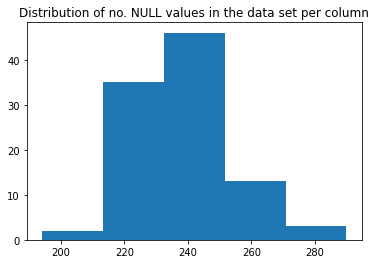

In [322]:
null_value_column_distribution = [val for val in list(india_train.isna().sum().to_dict().values()) if val > 0]
plt.title("Distribution of no. NULL values in the data set per column")
plt.hist(null_value_column_distribution,5)


Imputing NULL values

In [323]:
from sklearn.impute import SimpleImputer
from tqdm import tqdm
si = SimpleImputer(strategy='median')

districts = india_train['Dist Name'].unique()
all_columns = list(india_train.select_dtypes(exclude='object').columns)
for dist in tqdm(districts):
    data_imputed = si.fit_transform(india_train[india_train['Dist Name']==dist][all_columns])
    india_train.loc[india_train['Dist Name']==dist,all_columns] = data_imputed


all_test_columns = list(india_test.select_dtypes(exclude='object').columns)
for dist in tqdm(districts):
    data_imputed = si.fit_transform(india_test[india_test['Dist Name']==dist][all_test_columns])
    india_test.loc[india_test['Dist Name']==dist,all_test_columns] = data_imputed
    

100%|██████████| 279/279 [00:02<00:00, 136.20it/s]


In [324]:
india_train.isna().sum().sum() , india_test.isna().sum().sum()

(0, 0)

In [325]:
india_train= india_train.astype(float, errors='ignore')

In [326]:
india_train.dtypes

Year                                float64
State Name                           object
Dist Name                            object
COTTON AREA (1000 ha)               float64
COTTON PRODUCTION (1000 tons)       float64
                                     ...   
POTASH PER HA OF NCA (Kg per ha)    float64
POTASH PER HA OF GCA (Kg per ha)    float64
TOTAL CONSUMPTION (tons)            float64
TOTAL PER HA OF NCA (Kg per ha)     float64
TOTAL PER HA OF GCA (Kg per ha)     float64
Length: 103, dtype: object

In [327]:
#Feature averages like average precipitation, water deficit

india_train['avg_precipitation'] = india_train[precipitation].mean(axis=1)
india_train['avg_max_temp'] = india_train[temperature_max].mean(axis=1)
india_train['avg_min_temp'] = india_train[temperature_min].mean(axis=1)
india_train['avg_water_deficit'] = india_train[water_deficit].mean(axis=1)
india_train['fertilizer_score'] = india_train['NITROGEN PER HA OF NCA (Kg per ha)']*0.4 + india_train['PHOSPHATE PER HA OF NCA (Kg per ha)']*0.2 + india_train['POTASH PER HA OF NCA (Kg per ha)']*0.1

india_test['avg_precipitation'] = india_test[precipitation].mean(axis=1)
india_test['avg_max_temp'] = india_test[temperature_max].mean(axis=1)
india_test['avg_min_temp'] = india_test[temperature_min].mean(axis=1)
india_test['avg_water_deficit'] = india_test[water_deficit].mean(axis=1)
india_test['fertilizer_score'] = india_test['NITROGEN PER HA OF NCA (Kg per ha)']*0.4 + india_test['PHOSPHATE PER HA OF NCA (Kg per ha)']*0.2 + india_test['POTASH PER HA OF NCA (Kg per ha)']*0.1

In [328]:
removable_cols = precipitation + temperature_max + temperature_min + water_deficit + water_actual + water_potential + fertilizer

india_train.drop(removable_cols,axis=1,inplace=True)
india_test.drop(removable_cols,axis=1,inplace=True)


In [329]:
india_train['annual_rainfall'] = 0.0
india_test['annual_rainfall'] = 0.0

In [330]:
for i in range(districts.shape[0]):
    try:
        rainfall = soil_rainfall[soil_rainfall['Dist Name']==districts[i]]['ANNUAL NORMAL RAINFALL (Millimeters)'].values[0]
        india_train.loc[india_train['Dist Name']==districts[i],'annual_rainfall'] = rainfall
        india_test.loc[india_test['Dist Name']==districts[i],'annual_rainfall'] = rainfall
    except:
        pass


In [331]:
india_train['annual_rainfall'] = india_train['annual_rainfall']/12
india_test['annual_rainfall'] =india_test['annual_rainfall']/12

In [332]:
soil_rainfall['SOIL TYPE PERCENT (Percent)'].fillna(value=soil_rainfall['SOIL TYPE PERCENT (Percent)'].mode()[0],inplace=True)

In [333]:
major_soil_types = ['DYSTROPEPTS','FLUVENTS', 'INCEPTISOLS','LOAMY ALFISOLS','OCHREPTS','ORTHENTS',
                    'ORTHIDS','PSAMMENTS','SANDY ALFISOLS','TROPEPTS','UDALFS','UDOLLS','UDUPTS','USTALFS','VERTISOLS']

#************************* THIS FAVORABILITY SCORE IS BASED ON INFORMATION FROM BARD-AI************
# for correct assignment of favorability score for cotton production, in depth knowledge of other climatic factors is must

fav_score = {'DYSTROPEPTS':	2,'FLUVENTS':3,'INCEPTISOLS':4,'LOAMY ALFISOLS':5,'OCHREPTS':3,'ORTHENTS':	4,
             'ORTHIDS':5,'PSAMMENTS':1,'SANDY ALFISOLS':	2,'TROPEPTS':	3,'UDALFS':	5,'UDOLLS':	6,'UDUPTS':	5,
             'USTALFS':	6,'VERTISOLS':6,'UNK':0}

In [334]:
import re

In [335]:
def get_soil_profile(india_data,soil_rainfall):
    
    soil1 = []
    soil2 = []
    soil3 = []
    percent1 = []
    percent2 = []
    percent3 = []

    for i in tqdm(range(len(india_data))):
        dist = india_data.iloc[i]['Dist Name']
        soil_types = soil_rainfall.loc[soil_rainfall['Dist Name']==dist,'SOIL TYPE PERCENT (Percent)'].values[0]

        pattern = r'([A-Z\s/]+)'
        soil_list = re.findall(pattern, soil_types)
        soil_list = [substring.strip() for substring in soil_list]
        soil_list = [substring for substring in soil_list if substring]

        per_list = [int(per) for per in re.findall(r"\d+",soil_types)]
        percent_list = [p if p <= 100 else 100 for p in per_list]
            
        if (len(soil_list)==3):
            soil1.append(soil_list[0])
            soil2.append(soil_list[1])
            soil3.append(soil_list[2])
        elif (len(soil_list)==2):
            soil1.append(soil_list[0])
            soil2.append(soil_list[1])
            soil3.append('UNK')
        elif (len(soil_list)==1):
            soil1.append(soil_list[0])
            soil2.append('UNK')
            soil3.append('UNK')
        else:
            soil1.append('UNK')
            soil2.append('UNK')
            soil3.append('UNK')

        if (len(percent_list)==3):
            percent1.append(percent_list[0])
            percent2.append(percent_list[1])
            percent3.append(percent_list[2])
        elif (len(percent_list)==2):
            percent1.append(percent_list[0])
            percent2.append(percent_list[1])
            percent3.append(0)
        elif (len(percent_list)==1):
            percent1.append(percent_list[0])
            percent2.append(0)
            percent3.append(0)
        else:
            if(len(soil_list)>1):
                percent1.append(50)
                percent2.append(50)
            else:
                percent1.append(100)
                percent2.append(0)
            percent3.append(0)

    return soil1 ,soil2 ,soil3 ,percent1 ,percent2 ,percent3

In [336]:
def assign_soil_score(soil_list,fav_score):
    soil_scores = []
    for soil in soil_list:
        if soil=='INCEPTISOLS'or soil =='INNCEPTISOLS':
            soil_scores.append(fav_score['INCEPTISOLS'])
        elif soil=='LOAMY ALFISOL'or soil =='LOAMY ALFISOLS':
            soil_scores.append(fav_score['LOAMY ALFISOLS'])
        elif soil=='PSAMMENTS'or soil =='PSSAMENTS'or soil=='PSSAMNETS':
            soil_scores.append(fav_score['PSAMMENTS'])
        elif soil=='SANDY ALFISOL' or soil =='SANDY ALFISOLS':
            soil_scores.append(fav_score['SANDY ALFISOLS'])
        elif soil=='UDOLLS/UDALFS':
            avg_sc = (fav_score['UDOLLS']+fav_score['UDALFS'])/2
            soil_scores.append(avg_sc)
        elif soil =='UDUPTS/UDALFS':
            avg_sc = (fav_score['UDUPTS']+fav_score['UDALFS'])/2
            soil_scores.append(avg_sc)
        elif soil=='USTALF/USTOLLS' or soil =='USTALFS':
            soil_scores.append(fav_score['USTALFS'])
        elif soil in ['VERRTISOLS','VERTI SOLS','VERTIC OSILS','VERTIC SOILS','VERTIC SOLS','VERTISOLS','VRTIC SOILS']:
            soil_scores.append(fav_score['VERTISOLS'])
            
        else:
            try:
                soil_scores.append(fav_score[soil])
            except:
                soil_scores.append(0)

    return soil_scores

In [337]:
def get_total_score(india_data,soil_rainfall,fav_score):
    
    soil1 ,soil2 ,soil3 ,percent1 ,percent2 ,percent3 = get_soil_profile(india_data,soil_rainfall)
    soil1_score = assign_soil_score(soil1,fav_score)
    soil2_score = assign_soil_score(soil2,fav_score)
    soil3_score = assign_soil_score(soil3,fav_score)

    total_soil_score = []
    for i in range(len(india_data)):
        total_score = (soil1_score[i]*percent1[i] + soil2_score[i]*percent2[i] + soil3_score[i]*percent3[i])/3
        total_soil_score.append(total_score)
    
    return total_soil_score

In [338]:

train_soil_score = get_total_score(india_train,soil_rainfall,fav_score)
test_soil_score = get_total_score(india_test,soil_rainfall,fav_score)

  0%|          | 0/4705 [00:00<?, ?it/s]

100%|██████████| 2476/2476 [00:00<00:00, 4467.35it/s]


In [339]:
# india_train['soil_score'] = train_soil_score
# india_test['soil_score'] = test_soil_score

In [340]:
india_train.columns

Index(['Year', 'State Name', 'Dist Name', 'COTTON AREA (1000 ha)',
       'COTTON PRODUCTION (1000 tons)', 'COTTON YIELD (Kg per ha)',
       'TOTAL AREA (1000 ha)', 'FOREST AREA (1000 ha)',
       'BARREN AND UNCULTIVABLE LAND AREA (1000 ha)',
       'LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha)',
       'CULTIVABLE WASTE LAND AREA (1000 ha)',
       'PERMANENT PASTURES AREA (1000 ha)', 'OTHER FALLOW AREA (1000 ha)',
       'CURRENT FALLOW AREA (1000 ha)', 'NET CROPPED AREA (1000 ha)',
       'GROSS CROPPED AREA (1000 ha)', 'CROPING INTENSITY (Percent)',
       'avg_precipitation', 'avg_max_temp', 'avg_min_temp',
       'avg_water_deficit', 'fertilizer_score', 'annual_rainfall'],
      dtype='object')

In [341]:
india_train.drop(['State Name','Dist Name'], axis=1,inplace=True)
india_test.drop(['State Name','Dist Name','COTTON YIELD (Kg per ha)'], axis=1,inplace=True)

In [342]:
fig = px.scatter(india_train, x="COTTON PRODUCTION (1000 tons)", y="COTTON YIELD (Kg per ha)")
fig.show()

In [343]:
fig = px.scatter(india_train, x="COTTON AREA (1000 ha)", y="COTTON PRODUCTION (1000 tons)")
fig.show()

In [344]:
features = india_train.drop(['COTTON YIELD (Kg per ha)'],axis=1)
label = india_train['COTTON YIELD (Kg per ha)']

In [345]:
from sklearn.ensemble import ExtraTreesClassifier, AdaBoostClassifier
import matplotlib.pyplot as plt
model=AdaBoostClassifier(base_estimator=ExtraTreesClassifier())
model.fit(features,label)

AdaBoostClassifier(base_estimator=ExtraTreesClassifier())

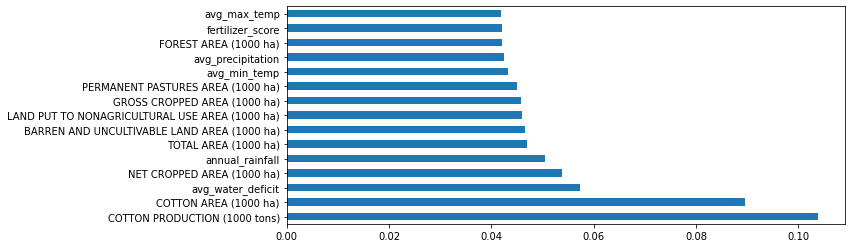

In [346]:
plt.figure(figsize = [10,4])
ranked_features=pd.Series(model.feature_importances_,index=features.columns)
ranked_features.nlargest(15).plot(kind='barh')
plt.show()

In [347]:
temp_train_data = features.copy()
temp_train_data['YIELD'] = label

In [348]:
selected_cols = list(ranked_features.nlargest(10).index)
selected_cols.append('YIELD')

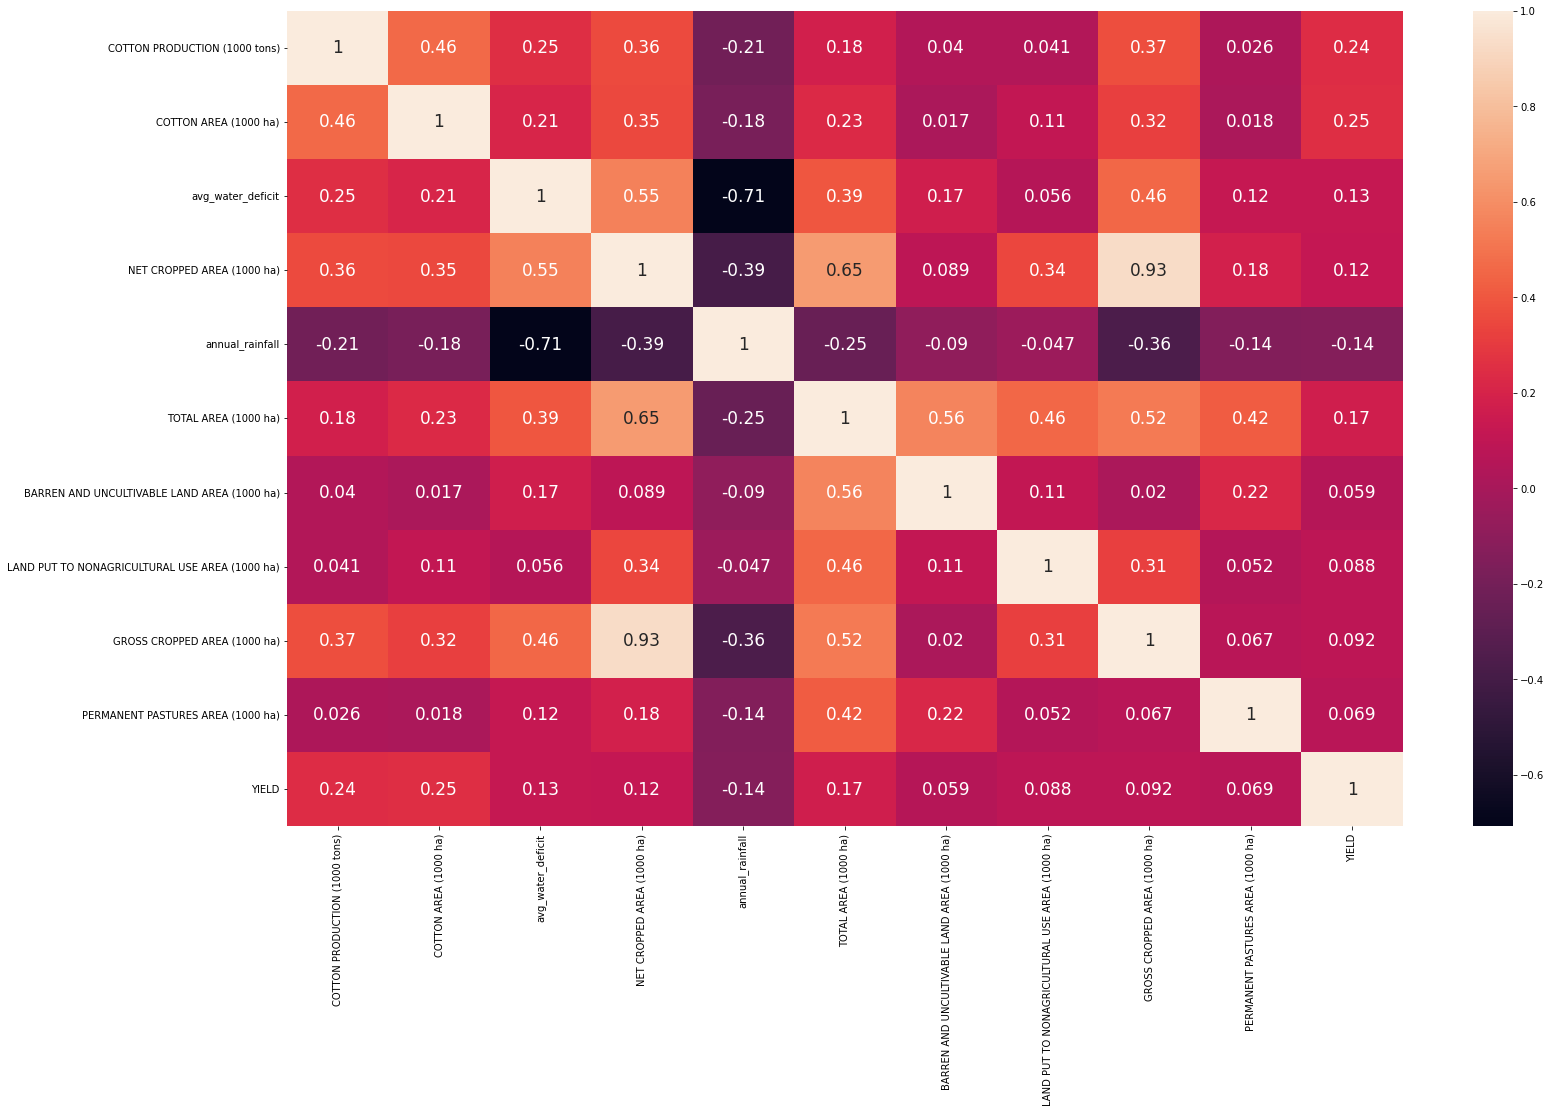

In [349]:
# Increase the annotation size and column text size
plt.figure(figsize=(25, 15))
sns.heatmap(temp_train_data[selected_cols].corr(), annot=True, annot_kws={"size": 17})
plt.show()

In [350]:
rem_cols = ['GROSS CROPPED AREA (1000 ha)','avg_precipitation','TOTAL AREA (1000 ha)','OTHER FALLOW AREA (1000 ha)','avg_max_temp','CROPING INTENSITY (Percent)','CULTIVABLE WASTE LAND AREA (1000 ha)','avg_water_deficit']

features.drop(rem_cols,axis=1,inplace=True)
india_test.drop(rem_cols,axis=1,inplace=True)

In [351]:
features

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),FOREST AREA (1000 ha),BARREN AND UNCULTIVABLE LAND AREA (1000 ha),LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha),PERMANENT PASTURES AREA (1000 ha),CURRENT FALLOW AREA (1000 ha),NET CROPPED AREA (1000 ha),avg_min_temp,fertilizer_score,annual_rainfall
0,1990.0,0.0,0.0,130.36,104.08,112.64,6.885,29.55,498.96,25.959167,30.789,92.000000
1,1990.0,7.0,3.0,535.76,202.15,126.13,7.820,20.80,511.69,22.673333,33.645,81.250000
2,1990.0,49.0,238.0,327.24,84.49,113.25,30.710,40.07,448.80,25.001250,106.901,90.666667
3,1990.0,26.0,120.0,85.19,50.32,93.54,27.320,6.41,447.61,25.221667,121.816,88.500000
4,1990.0,996.0,289.0,68.40,66.33,114.89,22.170,31.28,505.26,25.269583,90.904,88.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
4700,2006.0,0.0,0.0,180.00,4.26,84.52,0.000,20.05,339.73,23.305833,36.525,282.500000
4701,2006.0,0.0,0.0,127.58,6.49,36.63,1.760,14.34,144.36,20.360000,94.275,229.916667
4702,2006.0,0.0,0.0,4.68,0.00,87.42,0.000,71.08,212.40,22.862500,129.541,117.500000
4703,2006.0,0.0,0.0,7.26,2.35,68.19,1.140,4.89,252.27,23.491667,41.094,241.333333


In [352]:
india_test

,Year,COTTON AREA (1000 ha),COTTON PRODUCTION (1000 tons),FOREST AREA (1000 ha),BARREN AND UNCULTIVABLE LAND AREA (1000 ha),LAND PUT TO NONAGRICULTURAL USE AREA (1000 ha),PERMANENT PASTURES AREA (1000 ha),CURRENT FALLOW AREA (1000 ha),NET CROPPED AREA (1000 ha),avg_min_temp,fertilizer_score,annual_rainfall
0,2007.0,179.0,124.0,132.29,90.62,141.93,4.39,22.34,491.82,25.748333,43.0395,92.000000
1,2007.0,39.0,27.0,502.82,171.34,142.55,8.30,65.65,477.65,23.140000,34.5540,81.250000
2,2007.0,81.0,316.0,324.24,80.13,142.87,23.69,18.41,439.94,25.207500,108.5040,90.666667
3,2007.0,49.0,309.0,82.17,45.13,110.74,16.77,25.11,443.54,25.863333,165.1560,88.500000
4,2007.0,3479.0,1956.0,79.19,41.09,148.54,14.75,30.58,480.27,26.069583,123.0900,88.750000
...,...,...,...,...,...,...,...,...,...,...,...,...
2471,2015.0,0.0,0.0,183.00,4.24,96.46,0.00,11.42,340.05,22.358333,105.3360,282.500000
2472,2015.0,0.0,0.0,127.58,3.53,44.04,3.00,17.90,135.85,19.401667,0.0000,229.916667
2473,2015.0,0.0,0.0,5.68,0.00,86.28,0.00,50.97,239.90,22.066250,134.1470,117.500000
2474,2015.0,0.0,0.0,5.26,0.00,67.12,3.01,3.80,256.74,22.420000,55.0230,241.333333


In [353]:
# Scaling

from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()

standard_scaler.fit(features,label)

features = standard_scaler.transform(features)
india_test = standard_scaler.transform(india_test)

MODEL BUILDING

In [354]:
# Split the data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(features, label, test_size=0.1, random_state=42)

In [355]:
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor,GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRFRegressor

In [356]:
# params_small = {
#     'booster':['gbtree','dart'],
#     'gamma':[0,2,4],
#     'max_depth': [10, 20, 30, 40, 50,None],
#     'min_child_weight':[1,3,5,10],
#     'grow_policy':['depthwise','lossguide']
# }
# # Base model:
# xgb_base = XGBRFRegressor()

# #Randomized Search
# xgb_random = RandomizedSearchCV(estimator = xgb_base, param_distributions = params_small, n_iter = 5, cv = 4, verbose=2, random_state=42, n_jobs = -1)
# xgb_random.fit(features,label)

# #Building Model with best params
# xgb_model = xgb_random.best_estimator_
# xgb_model =  BaggingRegressor(base_estimator=LGBMRegressor())
# xgb_model.fit(features,label)

# #Making predictions
# y_pred_val = xgb_model.predict(X_val)

# # # Predict the validation set results
# # y_pred_val = model_fare.predict(X_val)
# # Calculate the MSE
# mse = np.sqrt(mean_squared_error(y_val, y_pred_val))
# print(f"Validation MSE: {mse}")



In [357]:
xgb = XGBRFRegressor()
xgb.get_params

<bound method XGBModel.get_params of XGBRFRegressor(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bytree=None,
               early_stopping_rounds=None, enable_categorical=False,
               eval_metric=None, feature_types=None, gamma=None, gpu_id=None,
               grow_policy=None, importance_type=None,
               interaction_constraints=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
               n_estimators=100, n_jobs=None, num_parallel_tree=None,
               objective='reg:squarederror', predictor=None, random_state=None,
               reg_alpha=None, ...)>

In [358]:
%%capture cell_out

import optuna
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def objective(trial):
    # Define the hyperparameter search space
    params = {
        'objective': 'regression',
        'metric': 'rmse',
        'boosting_type': 'gbdt',
        'num_leaves': trial.suggest_int('num_leaves', 10, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'random_state': 42
    }

    # Initialize the model with the suggested hyperparameters
    model = LGBMRegressor(**params)

    # Train the model and make predictions
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Calculate the Root Mean Squared Error (RMSE) as the objective to minimize
    rmse = np.sqrt(mean_squared_error(y_val, y_pred))

    return rmse

# Create an Optuna study object and optimize the objective function
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)

# Get the best hyperparameters from the study
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

[I 2023-07-21 17:55:49,071] A new study created in memory with name: no-name-34ae6727-df34-43c4-8b72-925b481490e5
[I 2023-07-21 17:55:49,204] Trial 0 finished with value: 2988.275870259839 and parameters: {'num_leaves': 39, 'learning_rate': 0.03218773033467407, 'feature_fraction': 0.11864090969044869, 'bagging_fraction': 0.8134155250791368, 'bagging_freq': 7, 'min_child_samples': 60, 'lambda_l1': 2.5836172195410536, 'lambda_l2': 0.0027417643853348164}. Best is trial 0 with value: 2988.275870259839.
[I 2023-07-21 17:55:49,379] Trial 1 finished with value: 1713.044736788974 and parameters: {'num_leaves': 54, 'learning_rate': 0.08301790967886402, 'feature_fraction': 0.8835968300915076, 'bagging_fraction': 0.5191828701557879, 'bagging_freq': 7, 'min_child_samples': 38, 'lambda_l1': 0.011792208491579357, 'lambda_l2': 0.00036514338042249956}. Best is trial 1 with value: 1713.044736788974.
[I 2023-07-21 17:55:49,486] Trial 2 finished with value: 1780.216175806197 and parameters: {'num_leaves'

In [359]:
base_model = LGBMRegressor(**best_params)

In [360]:
# Create a BaggingRegressor using the base model
model = BaggingRegressor(
    base_estimator=base_model,
    n_estimators=200,  # You can adjust the number of estimators for bagging.
    random_state=42
)

In [361]:
model.fit(X_train,y_train)

[LightGBM] [Warning] feature_fraction is set=0.5933249163811528, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.5933249163811528
[LightGBM] [Warning] bagging_fraction is set=0.8120922830769901, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8120922830769901
[LightGBM] [Warning] lambda_l1 is set=0.001281458919007804, reg_alpha=0.0 will be ignored. Current value: lambda_l1=0.001281458919007804
[LightGBM] [Warning] lambda_l2 is set=0.8523535493012359, reg_lambda=0.0 will be ignored. Current value: lambda_l2=0.8523535493012359
[LightGBM] [Warning] bagging_freq is set=3, subsample_freq=0 will be ignored. Current value: bagging_freq=3


BaggingRegressor(base_estimator=LGBMRegressor(bagging_fraction=0.8120922830769901,
                                              bagging_freq=3,
                                              feature_fraction=0.5933249163811528,
                                              lambda_l1=0.001281458919007804,
                                              lambda_l2=0.8523535493012359,
                                              learning_rate=0.07131389124088292,
                                              min_child_samples=24,
                                              num_leaves=49),
                 n_estimators=200, random_state=42)

In [362]:
# # Predict the yield in the test set
submission_india = model.predict(india_test)

In [363]:
# bagging_lgbm = BaggingRegressor(base_estimator=LGBMRegressor())

# bagging_lgbm.fit(features,label)

# submission_india = bagging_lgbm.predict(india_test)

In [364]:
submission_india = pd.Series(submission_india)
for i in range(len(submission_india)):
    if (submission_india.iloc[i] < 0):
        submission_india.iloc[i] = 0

In [365]:
submission_india

0       3797.348334
1       3940.453325
2       3321.083755
3       4445.247083
4       4993.866920
           ...     
2471       0.000000
2472     173.414683
2473      53.181766
2474      36.429321
2475     101.262346
Length: 2476, dtype: float64

# Let train USA data

In [366]:
usa_train['State'].isna().sum()

32

In [367]:
usa_train.columns

Index(['Year', 'State', 'Planted (1000 Acres)', 'Harvested (1000 Acres)',
       'Yield (Pounds/ Harvested Area)', 'Average Temperature Value',
       'Average Temperature Anomaly', 'Maximum Temperature Value',
       'Maximum Temperature Anomaly', 'Minimum Temperature Value',
       'Minimum Temperature Anomaly', 'Precipitation Value',
       'Precipitation Anomaly', 'Cooling Degree Days Value',
       'Cooling Degree Days Anomaly', 'Heating Degree Days Value',
       'Heating Degree Days Anomaly',
       'Palmer Drought Severity Index (PDSI) Value',
       'Palmer Drought Severity Index (PDSI) Anomaly',
       'Palmer Hydrological Drought Index (PHDI) Value',
       'Palmer Hydrological Drought Index (PHDI) Anomaly',
       'Palmer Modified Drought Index (PMDI) Value',
       'Palmer Modified Drought Index (PMDI) Anomaly', 'Palmer Z-Index Value',
       'Palmer Z-Index Anomaly'],
      dtype='object')

Imputing state-wise null-values

    Impute null values for state itself

In [368]:
state_order = usa_train['State'].to_list()[:20]
state_order[1] = 'AR'
print("Order or states in dataframe: ",state_order)

null_indices_train = usa_train[usa_train['State'].isnull()].index
null_indices_test = usa_test[usa_test['State'].isnull()].index

for idx in null_indices_train:
    usa_train.loc[idx,'State']=state_order[idx%20]

for idx in null_indices_test:
    usa_test.loc[idx,'State']=state_order[idx%20]

Order or states in dataframe:  ['AL', 'AR', 'AZ', 'CA', 'FL', 'GA', 'IL', 'KS', 'KY', 'LA', 'MO', 'MS', 'NC', 'NM', 'NV', 'OK', 'SC', 'TN', 'TX', 'VA']


In [369]:
usa_train['State'].isna().sum() , usa_test['State'].isna().sum()

(0, 0)

    Impute null values to all other columns

In [370]:
usa_train[['Planted (1000 Acres)', 'Harvested (1000 Acres)']] = usa_train[['Planted (1000 Acres)', 'Harvested (1000 Acres)']].apply(lambda x: np.float64(x.str.replace(',','')))
usa_test[['Planted (1000 Acres)', 'Harvested (1000 Acres)']] = usa_test[['Planted (1000 Acres)', 'Harvested (1000 Acres)']].apply(lambda x: np.float64(x.str.replace(',','')))

In [371]:
usa_train.isna().sum().sum() , usa_test.isna().sum().sum()

(565, 489)

In [372]:
#State-wise null value imputation

from sklearn.impute import SimpleImputer
si = SimpleImputer(strategy='median')

states = usa_train['State'].unique()

all_columns = list(usa_train.select_dtypes(exclude='object').columns)

for dist in tqdm(states):
    data_imputed = si.fit_transform(usa_train[usa_train['State']==dist][all_columns])
    usa_train.loc[usa_train['State']==dist,all_columns] = data_imputed

all_test_columns = list(usa_test.select_dtypes(exclude='object').columns)

for dist in tqdm(states):
    data_imputed = si.fit_transform(usa_test[usa_test['State']==dist][all_test_columns])
    usa_test.loc[usa_test['State']==dist,all_test_columns] = data_imputed


usa_train.isna().sum().sum() , usa_test.isna().sum().sum()

100%|██████████| 20/20 [00:00<00:00, 82.23it/s]


(0, 0)

In [373]:
usa_train.drop('State',axis=1,inplace=True)
usa_test.drop('State',axis=1,inplace=True)

In [374]:
train_data = usa_train
test_data = usa_test.drop('Yield (Pounds/ Harvested Area)',axis=1)

In [375]:
features = train_data.drop('Yield (Pounds/ Harvested Area)',axis=1)
label = train_data['Yield (Pounds/ Harvested Area)']

In [376]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model=ExtraTreesClassifier()
model.fit(features,label)

ExtraTreesClassifier()

In [377]:
print(model.feature_importances_)

[0.03960774 0.06501477 0.06179404 0.05072731 0.03952059 0.05266768
 0.04109513 0.04535733 0.04092461 0.04130347 0.03851305 0.04248279
 0.04007652 0.04992365 0.03733746 0.03853327 0.04166397 0.03779032
 0.03852961 0.03989462 0.03856056 0.03914415 0.03953735]


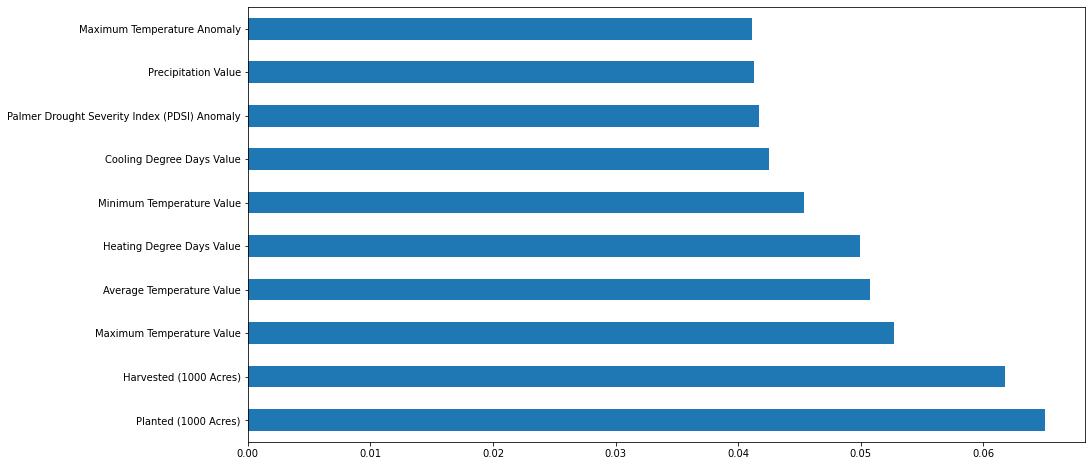

In [378]:
plt.figure(figsize = [15,8])
ranked_features=pd.Series(model.feature_importances_,index=features.columns)
ranked_features.nlargest(10).plot(kind='barh')
plt.show()

In [379]:
selected_cols = list(ranked_features.nlargest(13).index)
selected_cols.append('YIELD')

In [380]:
temp_train_data = features.copy()
temp_train_data['YIELD'] = label

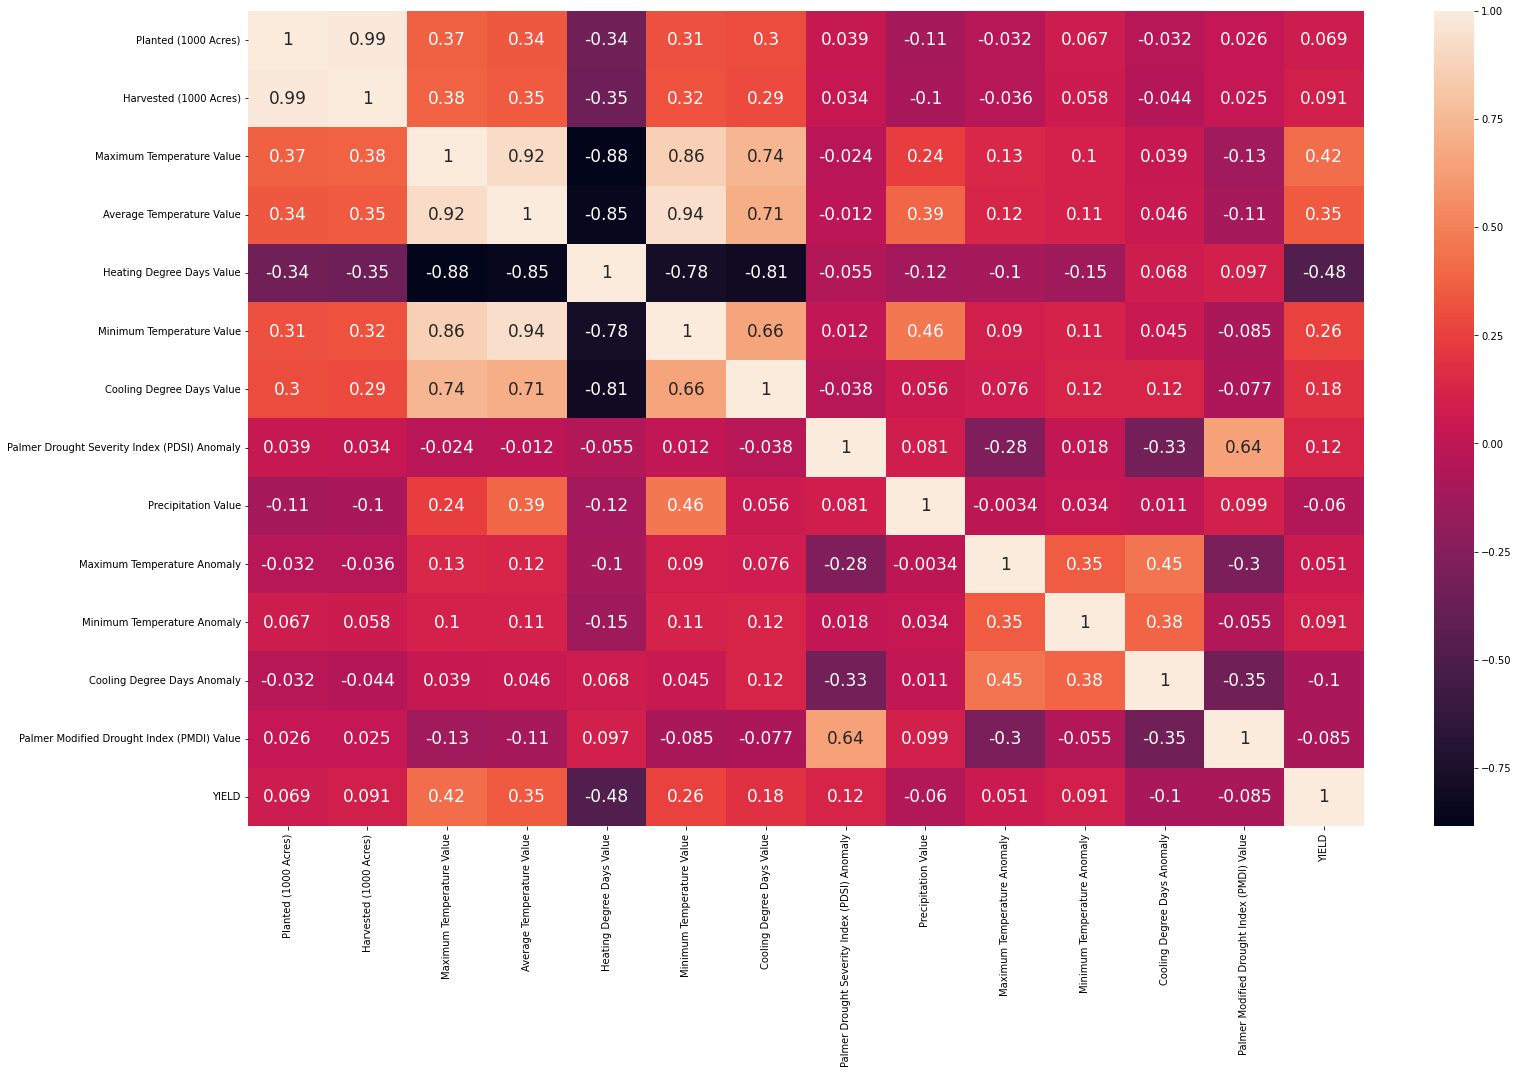

In [381]:
# Increase the annotation size and column text size
plt.figure(figsize=(25, 15))
sns.heatmap(temp_train_data[selected_cols].corr(), annot=True, annot_kws={"size": 17})
plt.show()

In [382]:
# features['avg_temp_prep'] = features['Average Temperature Value']*features['Precipitation Value']
# test_data['avg_temp_prep'] = test_data['Average Temperature Value']*test_data['Precipitation Value']

In [383]:
test_data

,Year,Planted (1000 Acres),Harvested (1000 Acres),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,Precipitation Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,2003.0,525.0,510.0,66.733333,1.475000,75.833333,1.033333,55.633333,3.933333,7.310000,...,237.833333,8.833333,5.057500,4.736667,5.936667,5.459167,6.582500,3.271667,5.014167,2.875000
1,2003.0,980.0,945.0,61.266667,3.616667,74.966667,0.366667,53.558333,1.841667,4.736667,...,292.083333,4.583333,4.019167,2.676667,1.060000,2.540000,2.038333,0.620000,0.772500,0.617500
2,2003.0,215.0,213.0,62.900000,4.275000,78.158333,4.383333,51.641667,2.208333,2.875833,...,155.750000,-10.000000,-0.618333,-1.799167,-0.618333,-1.827500,0.636667,-1.699167,1.313333,0.297500
3,2003.0,550.0,545.0,62.425000,1.775000,74.850000,1.683333,48.991667,4.858333,2.802500,...,237.666667,-3.500000,2.254167,2.083333,0.785833,2.496667,1.045000,1.740833,2.925000,2.179167
4,2003.0,99.0,92.0,73.275000,3.791667,84.208333,2.533333,61.533333,2.066667,6.897500,...,66.500000,8.916667,3.474167,3.084167,6.261667,4.939167,5.923333,6.546667,4.397500,3.614167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2022.0,660.0,310.0,62.900000,2.858333,78.133333,5.116667,48.683333,2.766667,3.464167,...,307.000000,3.583333,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167
396,2022.0,270.0,265.0,67.808333,3.791667,79.041667,2.608333,55.591667,5.008333,5.785000,...,209.500000,-12.083333,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000
397,2022.0,335.0,325.0,61.516667,3.475000,70.900000,2.900000,48.091667,2.191667,6.569167,...,300.708333,-2.000000,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333
398,2022.0,7900.0,2500.0,69.516667,5.208333,83.441667,4.833333,57.550000,2.566667,4.769167,...,164.916667,5.666667,1.205833,-2.430000,-3.491667,-1.742500,-0.339167,-1.484167,1.290833,0.240833


In [384]:
rem_cols = ['Planted (1000 Acres)','Average Temperature Value','Minimum Temperature Value','Palmer Hydrological Drought Index (PHDI) Value',
       'Palmer Hydrological Drought Index (PHDI) Anomaly',
       'Palmer Modified Drought Index (PMDI) Value',
       'Palmer Modified Drought Index (PMDI) Anomaly', 'Palmer Z-Index Value',
       'Palmer Z-Index Anomaly','Maximum Temperature Anomaly']

features = features.drop(rem_cols,axis=1)
test_data = test_data.drop(rem_cols,axis=1)

In [385]:
from sklearn.preprocessing import StandardScaler
stan_usa = StandardScaler()

stan_usa.fit(features,label)

StandardScaler()

In [386]:
X = stan_usa.transform(features)
test_data = stan_usa.transform(test_data)

In [387]:
# Split the data into training set and validation set
X_train, X_val, y_train, y_val = train_test_split(X, label, test_size=0.1, random_state=42)

In [388]:
# params_small = {
#     'booster':['gbtree','dart'],
#     'gamma':[0,2,4],
#     'max_depth':[0,5,15],
#     'min_child_weight':[1,3,5],
#     'grow_policy':['depthwise','lossguide']
# } FOR XGBRF

In [389]:
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor
from sklearn.model_selection import RandomizedSearchCV


# random_grid = {'bootstrap': [True, False],
#                'max_depth': [10, 20, 30, 40, 50,None],
#                'max_features': ['auto', 'sqrt'],
#                'min_samples_leaf': [1, 2, 4,8],
#                'min_samples_split': [2, 5, 10,15],
#                'n_estimators': [130, 180, 230,250]}
# rf = RandomForestRegressor()
# # Random search of parameters, using 3 fold cross validation,
# # search across 100 different combinations, and use all available cores
# rf_random = RandomizedSearchCV(estimator = rf, param_distributions = params_small, n_iter = 5, cv = 4, verbose=2, random_state=42, n_jobs = -1)

# # Fit the random search model
# rf_random.fit(features, label)
# usa_model = rf_random.best_estimator_

# usa_model.fit(features, label)

# # Predict the validation set results
# y_pred_val = usa_model.predict(X_val)

# # Calculate the MSE
# mse = np.sqrt(mean_squared_error(y_val, y_pred_val))
# print(f"Validation MSE: {mse}")


In [390]:
usa_model= AdaBoostRegressor(base_estimator=RandomForestRegressor())

usa_model.fit(features,label)


AdaBoostRegressor(base_estimator=RandomForestRegressor())

In [391]:
usa_test

,Year,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,Minimum Temperature Anomaly,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,2003.0,525.0,510.0,0.0,66.733333,1.475000,75.833333,1.033333,55.633333,3.933333,...,237.833333,8.833333,5.057500,4.736667,5.936667,5.459167,6.582500,3.271667,5.014167,2.875000
1,2003.0,980.0,945.0,0.0,61.266667,3.616667,74.966667,0.366667,53.558333,1.841667,...,292.083333,4.583333,4.019167,2.676667,1.060000,2.540000,2.038333,0.620000,0.772500,0.617500
2,2003.0,215.0,213.0,0.0,62.900000,4.275000,78.158333,4.383333,51.641667,2.208333,...,155.750000,-10.000000,-0.618333,-1.799167,-0.618333,-1.827500,0.636667,-1.699167,1.313333,0.297500
3,2003.0,550.0,545.0,0.0,62.425000,1.775000,74.850000,1.683333,48.991667,4.858333,...,237.666667,-3.500000,2.254167,2.083333,0.785833,2.496667,1.045000,1.740833,2.925000,2.179167
4,2003.0,99.0,92.0,0.0,73.275000,3.791667,84.208333,2.533333,61.533333,2.066667,...,66.500000,8.916667,3.474167,3.084167,6.261667,4.939167,5.923333,6.546667,4.397500,3.614167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2022.0,660.0,310.0,0.0,62.900000,2.858333,78.133333,5.116667,48.683333,2.766667,...,307.000000,3.583333,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167
396,2022.0,270.0,265.0,0.0,67.808333,3.791667,79.041667,2.608333,55.591667,5.008333,...,209.500000,-12.083333,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000
397,2022.0,335.0,325.0,0.0,61.516667,3.475000,70.900000,2.900000,48.091667,2.191667,...,300.708333,-2.000000,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333
398,2022.0,7900.0,2500.0,0.0,69.516667,5.208333,83.441667,4.833333,57.550000,2.566667,...,164.916667,5.666667,1.205833,-2.430000,-3.491667,-1.742500,-0.339167,-1.484167,1.290833,0.240833


In [392]:
test_data

array([[ 1.79505494, -0.06393032, -0.36595983, ..., -0.09021958,
         1.05324776,  1.01006703],
       [ 1.79505494,  0.33826557,  1.0813469 , ..., -0.26423669,
         0.57255638,  0.02334303],
       [ 1.79505494, -0.33853304,  1.52623885, ..., -0.86135423,
        -1.57435178, -2.12054638],
       ...,
       [ 4.14719589, -0.23497915,  0.98561065, ..., -0.53379261,
         0.16825094,  0.34426783],
       [ 4.14719589,  1.77600031,  2.15697174, ..., -0.21987939,
        -0.72986266, -2.42271064],
       [ 4.14719589, -0.45318198,  1.05882072, ..., -0.84088163,
        -1.00377188, -0.59335947]])

In [393]:
submission_usa=usa_model.predict(test_data)

c:\Users\hinde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning:

X does not have valid feature names, but AdaBoostRegressor was fitted with feature names



In [394]:
submission_usa = pd.Series(submission_usa)
submission_usa

0      273.62
1      276.43
2      292.09
3      253.00
4      291.15
        ...  
395    277.73
396    283.71
397    278.03
398    798.32
399    285.54
Length: 400, dtype: float64

In [395]:
usa_train_2 = pd.read_csv("dataset/USA_train.csv")
usa_test_2 = pd.read_csv("dataset/USA_test.csv")

In [396]:
usa_test_2

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,2003,AL,525,510,0,66.733333,1.475000,75.833333,1.033333,55.633333,...,237.833333,8.833333,5.057500,4.736667,5.936667,5.459167,6.582500,3.271667,5.014167,2.875000
1,2003,AR,980,945,0,61.266667,3.616667,74.966667,0.366667,53.558333,...,292.083333,4.583333,4.019167,2.676667,1.060000,2.540000,2.038333,0.620000,0.772500,0.617500
2,2003,AZ,215,213,0,62.900000,4.275000,78.158333,4.383333,51.641667,...,155.750000,-10.000000,-0.618333,-1.799167,-0.618333,-1.827500,0.636667,-1.699167,NaN,0.297500
3,2003,CA,550,545,0,62.425000,1.775000,74.850000,1.683333,48.991667,...,237.666667,-3.500000,2.254167,2.083333,0.785833,2.496667,1.045000,1.740833,2.925000,2.179167
4,2003,FL,NaN,92,0,NaN,3.791667,84.208333,2.533333,61.533333,...,66.500000,8.916667,3.474167,3.084167,6.261667,4.939167,5.923333,6.546667,4.397500,3.614167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2022,OK,660,310,0,62.900000,NaN,78.133333,5.116667,48.683333,...,307.000000,3.583333,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167
396,2022,SC,270,265,0,67.808333,3.791667,79.041667,2.608333,55.591667,...,209.500000,-12.083333,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000
397,2022,TN,335,325,0,61.516667,3.475000,70.900000,NaN,48.091667,...,NaN,-2.000000,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333
398,2022,TX,"7,900","2,500",0,69.516667,5.208333,83.441667,4.833333,57.550000,...,164.916667,5.666667,NaN,-2.430000,-3.491667,-1.742500,-0.339167,-1.484167,1.290833,0.240833


In [397]:
usa_test_2['Yield (Pounds/ Harvested Area)'] = submission_usa

In [398]:
usa_test_2

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,2003,AL,525,510,273.62,66.733333,1.475000,75.833333,1.033333,55.633333,...,237.833333,8.833333,5.057500,4.736667,5.936667,5.459167,6.582500,3.271667,5.014167,2.875000
1,2003,AR,980,945,276.43,61.266667,3.616667,74.966667,0.366667,53.558333,...,292.083333,4.583333,4.019167,2.676667,1.060000,2.540000,2.038333,0.620000,0.772500,0.617500
2,2003,AZ,215,213,292.09,62.900000,4.275000,78.158333,4.383333,51.641667,...,155.750000,-10.000000,-0.618333,-1.799167,-0.618333,-1.827500,0.636667,-1.699167,NaN,0.297500
3,2003,CA,550,545,253.00,62.425000,1.775000,74.850000,1.683333,48.991667,...,237.666667,-3.500000,2.254167,2.083333,0.785833,2.496667,1.045000,1.740833,2.925000,2.179167
4,2003,FL,NaN,92,291.15,NaN,3.791667,84.208333,2.533333,61.533333,...,66.500000,8.916667,3.474167,3.084167,6.261667,4.939167,5.923333,6.546667,4.397500,3.614167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,2022,OK,660,310,277.73,62.900000,NaN,78.133333,5.116667,48.683333,...,307.000000,3.583333,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167
396,2022,SC,270,265,283.71,67.808333,3.791667,79.041667,2.608333,55.591667,...,209.500000,-12.083333,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000
397,2022,TN,335,325,278.03,61.516667,3.475000,70.900000,NaN,48.091667,...,NaN,-2.000000,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333
398,2022,TX,"7,900","2,500",798.32,69.516667,5.208333,83.441667,4.833333,57.550000,...,164.916667,5.666667,NaN,-2.430000,-3.491667,-1.742500,-0.339167,-1.484167,1.290833,0.240833


In [399]:
usa = pd.concat([usa_train_2, usa_test_2], ignore_index=True)

In [400]:
usa

,Year,State,Planted (1000 Acres),Harvested (1000 Acres),Yield (Pounds/ Harvested Area),Average Temperature Value,Average Temperature Anomaly,Maximum Temperature Value,Maximum Temperature Anomaly,Minimum Temperature Value,...,Heating Degree Days Value,Heating Degree Days Anomaly,Palmer Drought Severity Index (PDSI) Value,Palmer Drought Severity Index (PDSI) Anomaly,Palmer Hydrological Drought Index (PHDI) Value,Palmer Hydrological Drought Index (PHDI) Anomaly,Palmer Modified Drought Index (PMDI) Value,Palmer Modified Drought Index (PMDI) Anomaly,Palmer Z-Index Value,Palmer Z-Index Anomaly
0,1975,AL,385,370,406.00,66.825000,1.566667,75.066667,2.266667,54.566667,...,224.916667,-1.083333,8.161667,6.840833,NaN,4.684167,6.132500,5.821667,4.857500,2.718333
1,1975,NaN,700,680,486.00,63.875000,2.225000,73.808333,1.208333,52.975000,...,299.250000,8.750000,6.674167,6.331667,5.414167,4.894167,5.098333,3.680000,1.537500,3.382500
2,1975,AZ,NaN,268,1028.00,61.891667,-0.733333,74.483333,-0.291667,45.283333,...,211.166667,43.416667,0.584167,0.403333,1.584167,0.375000,1.140833,2.805000,3.648333,0.893333
3,1975,CA,900,875,1074.00,NaN,-0.383333,72.700000,-0.466667,46.825000,...,303.083333,NaN,2.650000,4.479167,1.613333,4.324167,1.405000,2.100833,3.068333,2.322500
4,1975,FL,4,4,347.00,73.208333,4.133333,83.983333,2.308333,64.408333,...,49.916667,-6.666667,1.191667,1.801667,4.085000,1.762500,2.155000,1.778333,3.239167,3.455833
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
955,2022,OK,660,310,277.73,62.900000,NaN,78.133333,5.116667,48.683333,...,307.000000,3.583333,-0.355000,-2.042500,-0.355000,-2.168333,-0.256667,1.038333,0.125833,1.884167
956,2022,SC,270,265,283.71,67.808333,3.791667,79.041667,2.608333,55.591667,...,209.500000,-12.083333,2.810833,1.106667,2.596667,1.772500,0.732500,-0.065833,1.554167,0.610000
957,2022,TN,335,325,278.03,61.516667,3.475000,70.900000,NaN,48.091667,...,NaN,-2.000000,3.145833,3.346667,3.726667,2.779167,3.088333,4.300833,3.023333,3.728333
958,2022,TX,"7,900","2,500",798.32,69.516667,5.208333,83.441667,4.833333,57.550000,...,164.916667,5.666667,NaN,-2.430000,-3.491667,-1.742500,-0.339167,-1.484167,1.290833,0.240833


In [401]:
usa_df = usa.groupby("Year")["Yield (Pounds/ Harvested Area)"].sum()
merged_yield_df = usa_df.reset_index()

# usa_df2 = usa.groupby("Year")["Palmer Drought Severity Index (PDSI) Value"].sum()/20
# merged_yield_df2 = usa_df2.reset_index()

In [402]:
combined_df = merged_yield_df.merge(commodity, on="Year", how="inner")
# combined_df['pdsi'] = merged_yield_df2["Palmer Drought Severity Index (PDSI) Value"].values

In [403]:
combined_df

,Year,Yield (Pounds/ Harvested Area),Cotton_Price[Dollar/ton]
0,1975,8741.00,1055.792518
1,1976,8964.00,1582.035312
2,1977,8815.00,1399.933700
3,1978,8588.00,1350.109288
4,1979,9655.00,1428.152836
5,1980,7870.00,1869.517760
6,1981,10394.00,1697.116476
7,1982,11820.00,1446.892106
8,1983,8842.00,1655.008234
9,1984,11255.00,1604.963360


In [404]:
# # Set the 'Year' column as the index
# combined_df.set_index('Year', inplace=True)

# Reset the index to have the 'Year' column as a regular column again
combined_df['Cotton_Price[Dollar/ton]'].interpolate(method='linear', inplace=True)

# Print the updated DataFrame
combined_df

,Year,Yield (Pounds/ Harvested Area),Cotton_Price[Dollar/ton]
0,1975,8741.00,1055.792518
1,1976,8964.00,1582.035312
2,1977,8815.00,1399.933700
3,1978,8588.00,1350.109288
4,1979,9655.00,1428.152836
5,1980,7870.00,1869.517760
6,1981,10394.00,1697.116476
7,1982,11820.00,1446.892106
8,1983,8842.00,1655.008234
9,1984,11255.00,1604.963360


In [405]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, SGDRegressor, ridge_regression

# Create a new dataframe for modeling
df_model = combined_df.copy()

# Separate the available data and missing data
df_available = df_model[df_model['Cotton_Price[Dollar/ton]'] != 0]
df_missing = df_model[df_model['Cotton_Price[Dollar/ton]'] == 0]

# Create the feature matrix X and the target variable y
X = df_available[['Year', 'Yield (Pounds/ Harvested Area)']]
y = df_available['Cotton_Price[Dollar/ton]']

# Create a linear regression model
model = LinearRegression()

# Fit the model with available data
model.fit(X, y)

# Predict the missing values
X_missing = df_missing[['Year', 'Yield (Pounds/ Harvested Area)']]
predicted_prices = model.predict(X_missing)

# Assign the predicted values to the missing data in the dataframe
df_model.loc[df_model['Cotton_Price[Dollar/ton]'] == 0, 'Cotton_Price[Dollar/ton]'] = predicted_prices

df_model

,Year,Yield (Pounds/ Harvested Area),Cotton_Price[Dollar/ton]
0,1975,8741.00,1055.792518
1,1976,8964.00,1582.035312
2,1977,8815.00,1399.933700
3,1978,8588.00,1350.109288
4,1979,9655.00,1428.152836
5,1980,7870.00,1869.517760
6,1981,10394.00,1697.116476
7,1982,11820.00,1446.892106
8,1983,8842.00,1655.008234
9,1984,11255.00,1604.963360


### We need to find relation and fill the data from year 2003 to 2022 with the USA data

In [406]:
# Convert the 'Year' column to numeric type if it's not already
df_model['Year'] = pd.to_numeric(commodity['Year'])

# Select the rows between the years 2003 and 2022
submission_commodity = df_model[(df_model['Year'] >= 2003) & (commodity['Year'] <= 2022)]

In [407]:
submission_commodity

,Year,Yield (Pounds/ Harvested Area),Cotton_Price[Dollar/ton]
28,2003,6491.96,1535.113424
29,2004,6611.83,1530.115636
30,2005,7042.97,1517.278005
31,2006,7185.58,1511.707474
32,2007,6108.33,1536.861111
33,2008,6037.43,1536.668178
34,2009,5965.39,1536.503958
35,2010,6511.42,1520.772634
36,2011,6607.06,1516.385119
37,2012,6799.11,1509.569360


In [408]:
commodity = submission_commodity["Cotton_Price[Dollar/ton]"]

In [409]:
commodity = commodity.reset_index(drop=True)

In [410]:
commodity

0     1535.113424
1     1530.115636
2     1517.278005
3     1511.707474
4     1536.861111
5     1536.668178
6     1536.503958
7     1520.772634
8     1516.385119
9     1509.569360
10    1516.265224
11    1516.605996
12    1507.107357
13    1504.230032
14    1499.256424
15    1499.182120
16    1502.201742
17    1498.166085
18    1497.255081
19    1494.033455
Name: Cotton_Price[Dollar/ton], dtype: float64

### To create the final submission file

In [411]:
submission = pd.concat([submission_usa,submission_india,commodity],axis=1)

In [412]:
submission

,0,1,Cotton_Price[Dollar/ton]
0,273.62,3797.348334,1535.113424
1,276.43,3940.453325,1530.115636
2,292.09,3321.083755,1517.278005
3,253.00,4445.247083,1511.707474
4,291.15,4993.866920,1536.861111
...,...,...,...
2471,NaN,0.000000,NaN
2472,NaN,173.414683,NaN
2473,NaN,53.181766,NaN
2474,NaN,36.429321,NaN


In [413]:
submission.rename(columns={0:'Yield (Pounds/ Harvested Area)',1:'COTTON YIELD (Kg per ha)'},inplace=True)

In [414]:
submission

,Yield (Pounds/ Harvested Area),COTTON YIELD (Kg per ha),Cotton_Price[Dollar/ton]
0,273.62,3797.348334,1535.113424
1,276.43,3940.453325,1530.115636
2,292.09,3321.083755,1517.278005
3,253.00,4445.247083,1511.707474
4,291.15,4993.866920,1536.861111
...,...,...,...
2471,NaN,0.000000,NaN
2472,NaN,173.414683,NaN
2473,NaN,53.181766,NaN
2474,NaN,36.429321,NaN


In [415]:
submission = submission.fillna(0)

In [416]:
submission

,Yield (Pounds/ Harvested Area),COTTON YIELD (Kg per ha),Cotton_Price[Dollar/ton]
0,273.62,3797.348334,1535.113424
1,276.43,3940.453325,1530.115636
2,292.09,3321.083755,1517.278005
3,253.00,4445.247083,1511.707474
4,291.15,4993.866920,1536.861111
...,...,...,...
2471,0.00,0.000000,0.000000
2472,0.00,173.414683,0.000000
2473,0.00,53.181766,0.000000
2474,0.00,36.429321,0.000000


In [417]:
submission.to_csv("submission_final_5.csv",index=False)